Question: 2.iv.d.: How do the results of this analysis differ from pure association via correlation?

Goal: compare simple correlation of peak accessibility and gene expression to the regression model.

# Overview of files

In [1]:
import pandas as pd

RNA_filt = pd.read_csv(r"C:\Users\gusta\OneDrive\A MoBi\4. FS\Data Analysis\Fork 2\REAL_FORKED_abT-Tact-cells-Team2\RNA-seq\filtered_RNA_abT_Tact_Stem.csv")

print(RNA_filt.columns)
print(RNA_filt.shape)

RNA_filt.head()



Index(['Unnamed: 0', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.Gut',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM'],
      dtype='object')
(17535, 30)


,Unnamed: 0,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,0610005C13Rik,1.022363,1.389747,1.024819,1.024482,1.026430,1.026217,3.010920,1.024462,1.024819,...,1.025833,1.024819,1.385805,1.025833,1.575395,1.024819,1.096732,1.096732,1.021750,1.021812
1,0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
2,0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
3,0610009L18Rik,15.450717,13.573968,14.427620,8.249482,1.683173,4.001953,5.595954,6.367369,6.505833,...,8.645607,7.268431,3.840215,1.025833,6.283540,12.791348,8.577159,16.791386,15.511549,16.947354
4,0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464


In [2]:
import pandas as pd

ATAC = pd.read_csv("ATAC_high_var.csv")

print(ATAC.columns)
print(ATAC.shape)
ATAC.head()


Index(['ImmGenATAC1219.peakID', 'chrom', 'Summit',
       'mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb',
       'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'variance'],
      dtype='object')
(75857, 38)


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,preT.DN1.Th,preT.DN2a.Th,...,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,variance
0,ImmGenATAC1219.peak_69,chr1,4468579,0.00,7.11,1.0,NaN,"Rp1,Sox17",14.81,22.31,...,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89,21.404348
1,ImmGenATAC1219.peak_77,chr1,4490652,0.08,16.20,1.0,NaN,"Rp1,Sox17",59.36,43.17,...,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78,297.171420
2,ImmGenATAC1219.peak_83,chr1,4496479,0.40,23.81,1.0,NaN,"Rp1,Sox17",40.73,28.06,...,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68,182.666600
3,ImmGenATAC1219.peak_84,chr1,4496738,0.14,11.15,1.0,NaN,"Rp1,Sox17",23.05,8.10,...,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28,42.240147
4,ImmGenATAC1219.peak_93,chr1,4547574,0.14,41.55,1.0,NaN,Sox17,20.15,7.29,...,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80,16.024600


In [4]:
import pandas as pd

# 1. load, telling pandas there is no header and giving your own column names
colnames = [
    "GeneName",
    "TranscriptName",
    "Chromosome",
    "Strand",
    "TxStart",
    "TxEnd",
    "CDSStart",
    "CDSEnd",
    "ExonCount",
    "ExonStarts",
    "ExonEnds"
]
anno = pd.read_csv("refFlat",
                   sep="\t",
                   header=None,
                   names=colnames)


print(anno.columns)
print(anno.shape)

anno.head()

Index(['GeneName', 'TranscriptName', 'Chromosome', 'Strand', 'TxStart',
       'TxEnd', 'CDSStart', 'CDSEnd', 'ExonCount', 'ExonStarts', 'ExonEnds'],
      dtype='object')
(47382, 11)


,GeneName,TranscriptName,Chromosome,Strand,TxStart,TxEnd,CDSStart,CDSEnd,ExonCount,ExonStarts,ExonEnds
0,Wdsub1,NM_001159636,chr2,-,59855193,59882606,59855270,59878527,11,"59855193,59858609,59861560,59862619,59862816,5...","59855275,59858750,59861737,59862726,59862857,5..."
1,Rbm18,NM_001159635,chr2,-,36116078,36136704,36117814,36134247,6,"36116078,36120812,36122851,36127214,36134134,3...","36117974,36120898,36122938,36127251,36134263,3..."
2,Prrc2b,NM_001159634,chr2,+,32151147,32234537,32182511,32230742,32,"32151147,32182457,32183122,32185344,32187480,3...","32151291,32182626,32183300,32185447,32187553,3..."
3,Ildr2,NM_001164528,chr1,+,166254138,166316832,166254375,166310795,10,"166254138,166269304,166270498,166291415,166294...","166254466,166269637,166270618,166291472,166294..."
4,Perm1,NM_172417,chr4,+,156215926,156221307,156217000,156220222,4,"156215926,156216716,156219740,156220109,","156215975,156219185,156219866,156221307,"


# Preparation of datasets for correlation analysis

Didn't work because couldn't relate peaks to genes

In [28]:
import pandas as pd

# 1) RNA: use the “Unnamed: 0” column as your transcript index
RNA = RNA_filt.copy()
RNA = RNA.set_index("Unnamed: 0")
RNA.index.name = "TranscriptName"
print(f"RNA matrix: {RNA.shape}, index=name={RNA.index.name}")

# 2) ATAC: set peakID as index, and split metadata vs. cell columns
ATAC = ATAC.copy()
ATAC = ATAC.set_index("ImmGenATAC1219.peakID")
ATAC.index.name = "PeakID"

# metadata cols  (first 8 in your description)
meta_cols = [
    "chrom", "Summit", "mm10.60way.phastCons_scores",
    "_-log10_bestPvalue", "Included.in.systematic.analysis",
    "TSS", "genes.within.100Kb"
]
# find exactly those in the DF (just in case)
meta_cols = [c for c in meta_cols if c in ATAC.columns]

# all the rest are cell-type columns (plus “variance” at end, if you like)
cell_cols = [c for c in ATAC.columns 
             if c not in meta_cols and c != "variance"]
print(f"ATAC matrix: {ATAC.shape}, metadata cols={len(meta_cols)}, cell cols={len(cell_cols)}")

# 3) anno: set TranscriptName as index
anno = anno.copy()
anno = anno.set_index("TranscriptName")
print(f"anno table: {anno.shape}, index=name={anno.index.name}")

# 4) Pull out only the matching cell-type vectors in the same order
#    (so RNA[cell_cols] and ATAC[cell_cols] align)
common_cells = [c for c in cell_cols if c in RNA.columns]
print(f"Found {len(common_cells)} common cell types between RNA & ATAC")

rna_mat  = RNA[common_cells]
atac_mat = ATAC[cell_cols].loc[:, common_cells]  # re-order to match RNA

# 5) Build a mapping of PeakID → list of TranscriptNames via your 100Kb field
gene_lists = ATAC["genes.within.100Kb"]        # bracket-access, not .genes.within.100Kb
mapping = (
    gene_lists
      .str.split(";")        # split the semicolon-separated strings into lists
      .explode()             # one row per PeakID–TranscriptName pair
      .dropna()              # drop any empty entries
      .rename("TranscriptName")
      .to_frame()
)

# restore PeakID as a column
mapping = mapping.reset_index().rename(columns={"index": "PeakID"})

# 6) (Optional) filter to only those transcripts that actually exist in your anno:
mapping = mapping[mapping.TranscriptName.isin(anno.index)]
print(f"Mapped {mapping.shape[0]} peak↔transcript pairs")

# Now you have:
#   • rna_mat    : (nTranscripts × nCells) expression matrix
#   • atac_mat   : (nPeaks       × nCells) accessibility matrix
#   • mapping    : DataFrame with columns [PeakID, TranscriptName]
#
# You can feed these into your correlation or regression loops easily!


RNA matrix: (17535, 29), index=name=TranscriptName
ATAC matrix: (75857, 37), metadata cols=7, cell cols=29
anno table: (47382, 10), index=name=TranscriptName
Found 28 common cell types between RNA & ATAC
Mapped 0 peak↔transcript pairs


In [29]:
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# --- 1) Collapse RNA transcript → gene level ---
# anno: index=TranscriptName, columns include GeneName
rna = RNA_filt.set_index("Unnamed: 0")
rna.index.name = "TranscriptName"

# join the gene symbol
rna2 = (
    rna
    .reset_index()
    .merge(anno[["GeneName"]], left_on="Unnamed: 0", right_index=True)
    .dropna(subset=["GeneName"])
)

# now average (or sum) all transcripts for each GeneName
rna_gene = (
    rna2
    .groupby("GeneName")
    .mean()           # mean across transcripts
    .drop(columns=["TranscriptName"], errors="ignore")
)
print(f"gene-level RNA: {rna_gene.shape}")

# --- 2) Prepare ATAC matrix & list of peaks → gene symbols ---
ATAC2 = ATAC.copy().set_index("ImmGenATAC1219.peakID")
atac_mat = ATAC2[cell_cols]  # the 29 cell columns you identified

# explode the semicolon-separated gene symbols
peak2gene = (
    ATAC2["genes.within.100Kb"]
      .str.split(";")
      .explode()
      .dropna()
      .rename("GeneName")
      .to_frame()
      .reset_index()    # columns now [PeakID, GeneName]
)

# optional: filter to genes you actually have expression for
peak2gene = peak2gene[peak2gene.GeneName.isin(rna_gene.index)]
print(f"Found {peak2gene.shape[0]} peak→gene pairs")

# --- 3) Compute correlations peak vs. gene-level expression ---
results = []
for peak, grp in peak2gene.groupby("PeakID"):
    x = atac_mat.loc[peak].values
    for gene in grp.GeneName:
        y = rna_gene.loc[gene].values
        r, p = pearsonr(x, y)
        results.append((peak, gene, r, p))

corr_df = pd.DataFrame(results, columns=["PeakID","GeneName","r","pval"])
corr_df["qval"] = multipletests(corr_df.pval, method="fdr_bh")[1]

# filter/significant table
sig = corr_df.query("qval<0.05").sort_values("r", ascending=False)
print(f"{len(corr_df)} total tests, {len(sig)} significant (FDR<0.05)")


KeyError: 'Unnamed: 0'

In [9]:
set1 = set(RNA_filt["Unnamed: 0"].dropna())
set2 = set(anno["GeneName"].dropna())

# 2) compute intersection and differences
common   = set1 & set2       # in both
only1    = set1 - set2       # only in df1
only2    = set2 - set1       # only in df2

# 3) print out counts
print(f"Total in RNA_filt: {len(set1)}")
print(f"Total in anno: {len(set2)}")
print(f"Matching transcripts: {len(common)}")
print(f"Only in RNA_filt:          {len(only1)}")
print(f"Only in anno:          {len(only2)}")

Total in RNA_filt: 17535
Total in anno: 26214
Matching transcripts: 16857
Only in RNA_filt:          678
Only in anno:          9357


In [8]:
import pandas as pd

# 1) Pull out the list of genes you actually have expression for:
genes = set(RNA_filt["Unnamed: 0"].dropna())
print(f"{len(genes)} unique gene symbols in RNA_filt")

# 2) Subset your annotation table to just those genes
#    anno has columns [GeneName, TranscriptName, …]
hits = anno[anno["GeneName"].isin(genes)]

print(f"{len(hits)} transcript entries in anno match your expressed genes")
print(hits.head())

# 3) If you want a one-row-per-gene summary of how many transcripts each has:
tx_per_gene = (
    hits
      .groupby("GeneName")      # group by the symbol
      .TranscriptName
      .agg(list)                # collect all transcripts into a list
      .rename("Transcripts")
      .to_frame()
      .reset_index()
)

print(tx_per_gene.head(10))
# e.g.:
#       GeneName                   Transcripts
# 0   0610005C13Rik  [NM_001159636, NM_001159637]
# 1   0610007P14Rik            [NM_001159635]
# …

# 4) You can also see which genes had **no** transcripts in anno:
no_hits = sorted(genes - set(hits.GeneName))
print(f"{len(no_hits)} genes in RNA_filt weren’t found in anno, e.g.: {no_hits[:10]}")


17535 unique gene symbols in RNA_filt
34113 transcript entries in anno match your expressed genes
  GeneName TranscriptName Chromosome Strand    TxStart      TxEnd   CDSStart  \
0   Wdsub1   NM_001159636       chr2      -   59855193   59882606   59855270   
1    Rbm18   NM_001159635       chr2      -   36116078   36136704   36117814   
2   Prrc2b   NM_001159634       chr2      +   32151147   32234537   32182511   
3    Ildr2   NM_001164528       chr1      +  166254138  166316832  166254375   
4    Perm1      NM_172417       chr4      +  156215926  156221307  156217000   

      CDSEnd  ExonCount                                         ExonStarts  \
0   59878527         11  59855193,59858609,59861560,59862619,59862816,5...   
1   36134247          6  36116078,36120812,36122851,36127214,36134134,3...   
2   32230742         32  32151147,32182457,32183122,32185344,32187480,3...   
3  166310795         10  166254138,166269304,166270498,166291415,166294...   
4  156220222          4        

In [10]:
import pandas as pd

# 1) rename the “Unnamed: 0” column so it’s clear it holds gene symbols
RNA = RNA_filt.rename(columns={"Unnamed: 0": "GeneName"})

# 2) filter to only those GeneNames that appear in anno.GeneName
valid_genes = set(anno["GeneName"])
RNA = RNA[RNA["GeneName"].isin(valid_genes)].copy()

# 3) (optional) reset the index if you like
RNA.reset_index(drop=True, inplace=True)

# 4) sanity‐check
print(f"Filtered RNA shape: {RNA.shape}")
print(f"Should have dropped 678 rows → {17535 - RNA.shape[0]}")

# Now `RNA` has only the 16857 genes that are in your annotation


Filtered RNA shape: (16857, 30)
Should have dropped 678 rows → 678


In [11]:
import pandas as pd

# 1) pull out & split the ATAC gene‐lists
# dropna so empty cells don’t give you a [nan] entry
atac_lists = ATAC["genes.within.100Kb"].dropna().str.split(";")

# explode into a single Series of gene names, then dedupe
all_atac_genes = set(atac_lists.explode())

# 2) get your RNA gene set
rna_genes = set(RNA["GeneName"].dropna())

# 3) find the intersection (and also the differences, if you like)
common_genes = all_atac_genes & rna_genes
only_in_atac  = all_atac_genes - rna_genes
only_in_rna   = rna_genes - all_atac_genes

print(f"Total unique genes in ATAC lists: {len(all_atac_genes)}")
print(f"Total genes in RNA:             {len(rna_genes)}")
print(f"Overlap (in both):              {len(common_genes)}")
print(f"Only in ATAC lists:             {len(only_in_atac)}")
print(f"Only in RNA:                    {len(only_in_rna)}")

# (Optional) see a few examples
print("Example overlapping genes:", list(common_genes)[:10])
print("Example only-in-ATAC genes:", list(only_in_atac)[:10])


Total unique genes in ATAC lists: 18303
Total genes in RNA:             16857
Overlap (in both):              2396
Only in ATAC lists:             15907
Only in RNA:                    14461
Example overlapping genes: ['Pgr15l', 'Rai2', 'Ttc39c', 'Slc4a4', 'Gcnt4', 'Dab2ip', 'Btrc', 'Spopl', 'Papss2', 'Grk5']
Example only-in-ATAC genes: ['Amotl1,Piwil4', 'Asap2,Itgb1bp1,Cpsf3', 'Exph5,Kdelc2,Mir130c,4930550C14Rik', 'Slc39a11,Sstr2', 'Dpy30,Spast,Slc30a6,Nlrc4,Yipf4', 'Chst3,Psap,Vsir', 'Add1,Mir7036b,Mfsd10,Nop14,Grk4,Mir467g', 'Cnot4,Nup205,1810058I24Rik', 'Myo5c,Gnb5,Bcl2l10', 'Mir1898,Mtmr12,Golph3']


In [15]:
peak_to_gene = pd.read_csv("peak_to_gene_annotated.csv")

peak_to_gene.head()

,peak_id,chrom,peak_center,start,end,gene_symbol,tss,strand,signed_distance_to_tss,distance_to_tss
0,ImmGenATAC1219.peak_1,chr1,3020786,3020786,3020787,Xkr4,3671498,-,650712,650712
1,ImmGenATAC1219.peak_2,chr1,3087226,3087226,3087227,Xkr4,3671498,-,584272,584272
2,ImmGenATAC1219.peak_3,chr1,3120109,3120109,3120110,Xkr4,3671498,-,551389,551389
3,ImmGenATAC1219.peak_4,chr1,3121485,3121485,3121486,Xkr4,3671498,-,550013,550013
4,ImmGenATAC1219.peak_5,chr1,3372787,3372787,3372788,Xkr4,3671498,-,298711,298711


In [16]:
all_pg_cor = pd.read_csv("all_peak_gene_correlations.csv")

all_pg_cor.head()

,peak_id,gene_symbol,signed_distance_to_tss,spearman_rho,pval
0,ImmGenATAC1219.peak_40,Rp1,90921,0.366699,0.054935
1,ImmGenATAC1219.peak_41,Rp1,82495,0.201068,0.304905
2,ImmGenATAC1219.peak_42,Rp1,79777,0.501165,0.006594
3,ImmGenATAC1219.peak_43,Rp1,76586,-0.205367,0.294463
4,ImmGenATAC1219.peak_44,Rp1,63686,0.308451,0.110272


In [17]:
import pandas as pd
from scipy.stats import pearsonr
from tqdm import tqdm   # optional, for a progress bar

# ─── 1) Identify the cell-type columns shared by your two matrices ───
# assume RNA_filt has been filtered so its "Unnamed: 0" → GeneName,
# and anno is unchanged from your last step.

# 1a) rename and index RNA by GeneName
RNA = (
    RNA_filt
      .rename(columns={"Unnamed: 0": "GeneName"})
      .set_index("GeneName")
)

# 1b) index ATAC by PeakID (if not already)
ATAC2 = ATAC.set_index("ImmGenATAC1219.peakID")

# 1c) pick out only the cell-type columns (they’ll be the intersection)
rna_cells  = set(RNA.columns)
atac_cells = set(ATAC2.columns) - {"chrom","Summit","variance", 
                                   "mm10.60way.phastCons_scores",
                                   "_-log10_bestPvalue",
                                   "Included.in.systematic.analysis",
                                   "TSS","genes.within.100Kb"}
common_cells = sorted(rna_cells & atac_cells)

print(f"Using {len(common_cells)} cell types:", common_cells)

# ─── 2) Prep your annotation table for TxStart lookups ───
# Make sure TxStart is an integer, and index by GeneName
anno2 = (
    anno
      .assign(TxStart = anno.TxStart.astype(int))
      .set_index("GeneName")
)

# ─── 3) Loop over each peak and compute correlations ───
results = []

for peak_id, peak_row in tqdm(ATAC2.iterrows(), total=len(ATAC2)):
    chrom  = peak_row["chrom"]
    summit = int(peak_row["Summit"])
    
    # 3a) find all genes on the same chromosome within ±100kb of summit
    window_lo = summit - 100_000
    window_hi = summit + 100_000
    
    # subset anno2 for chrom and TxStart in window
    nearby = anno2.query(
        "Chromosome == @chrom and @window_lo <= TxStart <= @window_hi"
    ).index.tolist()
    
    if not nearby:
        continue
    
    # extract the peak’s accessibility vector
    x = peak_row[common_cells].values.astype(float)
    
    # 3b) for each nearby gene, pull its expression vector & correlate
    for gene in nearby:
        if gene not in RNA.index:
            continue
        y = RNA.loc[gene, common_cells].values.astype(float)
        
        # compute Pearson’s r and two-sided p
        r, p = pearsonr(x, y)
        
        results.append({
            "PeakID":          peak_id,
            "GeneName":        gene,
            "chromosome":      chrom,
            "summit":          summit,
            "TxStart":         anno2.at[gene, "TxStart"],
            "distance_to_tx":  summit - anno2.at[gene, "TxStart"],
            "pearson_r":       r,
            "p_value":         p
        })

# ─── 4) Collect into a DataFrame and adjust FDR ───
corr_df = pd.DataFrame(results)
from statsmodels.stats.multitest import multipletests

corr_df["q_value"] = multipletests(corr_df["p_value"], method="fdr_bh")[1]

# ─── 5) Quick summary ───
print(f"Tested {len(corr_df)} peak–gene pairs.")
print("Top positive correlations:\n", corr_df.sort_values("pearson_r", ascending=False).head())
print("Top negative correlations:\n", corr_df.sort_values("pearson_r").head())
print(f"Significant at FDR<0.05: { (corr_df.q_value<0.05).sum() }")

# You can now save or further filter corr_df as you like:
# corr_df.to_csv("peak_gene_correlations.csv", index=False)


Using 28 cell types: ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'STHSC.150-.BM', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


100%|██████████| 75857/75857 [42:44<00:00, 29.58it/s]  


Tested 443133 peak–gene pairs.
Top positive correlations:
                             PeakID GeneName chromosome     summit  \
428022  ImmGenATAC1219.peak_495434       Ky       chr9  102502202   
273205  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   
273202  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   
273199  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   
428025  ImmGenATAC1219.peak_495435       Ky       chr9  102502481   

                                                  TxStart  \
428022                                          102506137   
273205  GeneName
Tek    94739288
Tek    94739288
Tek  ...   
273202  GeneName
Tek    94739288
Tek    94739288
Tek  ...   
273199  GeneName
Tek    94739288
Tek    94739288
Tek  ...   
428025                                          102506137   

                                           distance_to_tx  pearson_r  \
428022                                              -3935   0.996851   
273205  GeneNam

# ** **DELETE LATER** **

A few broad take-aways from what you just ran:

### Scale of the test

- You had 75 857 peaks, each potentially linked to many genes in ±100 kb, and you tested every such peak–gene pair.

- That gave you 443 133 individual Pearson correlations across your 28 cell-type vectors.

### Strong positive hits

- The very top positive correlations are almost perfect (r≈0.99) between certain peaks and certain genes.

- For example, ImmGenATAC1219.peak_495434 (summit at chr9:102 502 202) correlates with Ky (TxStart≈102 506 137, distance≈–3.9 kb) at r=0.99685 (q≈1.7 ×10⁻²⁴).

- Likewise, multiple adjacent peaks around chr4:94.7 Mb all correlate at r≈0.995 with Tek (TxStart≈94 739 288, distance≈–47.9 kb).

### Strong negative hits

- You also see very substantial inverse relationships (r≈–0.87) where—for instance—peak_509214 near Btk (chrX:134 542 340, distance≈+43 kb) is anti-correlated with Btk expression across cell types (q≈1.8 ×10⁻⁷).

- These may point to repressive elements or to peaks whose accessibility marks a cell state in which that gene is downregulated.

### Multiple test correction

- Out of 443 133 tests, 58 730 survived an FDR < 0.05 cutoff.

- That’s still a large number, so you’ll want to further filter by effect size (e.g. |r|>0.5 or >0.7) or by distance if you only care about the very nearest elements.

### Weird TxStart/distance entries

- You’ll notice in the printout that under TxStart and distance_to_tx, some cells look like little data-frames rather than single numbers.

- That’s because in the loop you used anno2.at[gene, "TxStart"] on an index that (after your earlier .query(...)) was actually a multi-index or duplicated entry.

In [18]:
import pandas as pd
from scipy.stats import pearsonr
from tqdm import tqdm   # optional, for a progress bar

# ─── 1) Identify the cell-type columns shared by your two matrices ───
# assume RNA_filt has been filtered so its "Unnamed: 0" → GeneName,
# and anno is unchanged from your last step.

# 1a) rename and index RNA by GeneName
RNA = (
    RNA_filt
      .rename(columns={"Unnamed: 0": "GeneName"})
      .set_index("GeneName")
)

# 1b) index ATAC by PeakID (if not already)
ATAC2 = ATAC.set_index("ImmGenATAC1219.peakID")

# 1c) pick out only the cell-type columns (they’ll be the intersection)
rna_cells  = set(RNA.columns)
atac_cells = set(ATAC2.columns) - {"chrom","Summit","variance", 
                                   "mm10.60way.phastCons_scores",
                                   "_-log10_bestPvalue",
                                   "Included.in.systematic.analysis",
                                   "TSS","genes.within.100Kb"}
common_cells = sorted(rna_cells & atac_cells)

print(f"Using {len(common_cells)} cell types:", common_cells)

# ─── 2) Prep your annotation table for TxStart lookups ───
# Make sure TxStart is an integer, and index by GeneName
anno2 = (
    anno
      .assign(TxStart = anno.TxStart.astype(int))
      .set_index("GeneName")
)

# ─── 3) Loop over each peak and compute correlations ───
results = []

for peak_id, peak_row in tqdm(ATAC2.iterrows(), total=len(ATAC2)):
    chrom  = peak_row["chrom"]
    summit = int(peak_row["Summit"])

    # 3a) find all genes on the same chromosome within ±100kb
    window_lo = summit - 100_000
    window_hi = summit + 100_000

    nearby = anno2.query(
        "Chromosome == @chrom and @window_lo <= TxStart <= @window_hi"
    ).index.tolist()
    if not nearby:
        continue

    # extract the peak’s accessibility vector once per peak
    x = peak_row[common_cells].values.astype(float)

    # 3b) for each nearby gene, pull TxStart safely, then correlate
    for gene in nearby:
        if gene not in RNA.index:
            continue

        # --- pull TxStart and coerce to a single integer ---
        tx = anno2.loc[gene, "TxStart"]
        if isinstance(tx, pd.Series):
            tx = tx.iloc[0]
        tx = int(tx)

        distance = summit - tx

        # pull expression vector and compute Pearson’s r
        y = RNA.loc[gene, common_cells].values.astype(float)
        r, p = pearsonr(x, y)

        results.append({
            "PeakID":          peak_id,
            "GeneName":        gene,
            "chromosome":      chrom,
            "summit":          summit,
            "TxStart":         tx,
            "distance_to_tx":  distance,
            "pearson_r":       r,
            "p_value":         p
        })


# ─── 4) Collect into a DataFrame and adjust FDR ───
corr_df = pd.DataFrame(results)
from statsmodels.stats.multitest import multipletests

corr_df["q_value"] = multipletests(corr_df["p_value"], method="fdr_bh")[1]

# ─── 5) Quick summary ───
print(f"Tested {len(corr_df)} peak–gene pairs.")
print("Top positive correlations:\n", corr_df.sort_values("pearson_r", ascending=False).head())
print("Top negative correlations:\n", corr_df.sort_values("pearson_r").head())
print(f"Significant at FDR<0.05: { (corr_df.q_value<0.05).sum() }")

# You can now save or further filter corr_df as you like:
# corr_df.to_csv("peak_gene_correlations.csv", index=False)


Using 28 cell types: ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'STHSC.150-.BM', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


100%|██████████| 75857/75857 [31:08<00:00, 40.59it/s]  


Tested 443133 peak–gene pairs.
Top positive correlations:
                             PeakID GeneName chromosome     summit    TxStart  \
428022  ImmGenATAC1219.peak_495434       Ky       chr9  102502202  102506137   
273205  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   94739288   
273202  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   94739288   
273199  ImmGenATAC1219.peak_340754      Tek       chr4   94691306   94739288   
428025  ImmGenATAC1219.peak_495435       Ky       chr9  102502481  102506137   

        distance_to_tx  pearson_r       p_value       q_value  
428022           -3935   0.996851  3.730822e-30  1.653250e-24  
273205          -47982   0.995281  7.122245e-28  6.892275e-23  
273202          -47982   0.995281  7.122245e-28  6.892275e-23  
273199          -47982   0.995281  7.122245e-28  6.892275e-23  
428025           -3656   0.995249  7.776757e-28  6.892275e-23  
Top negative correlations:
                             PeakID GeneName chro

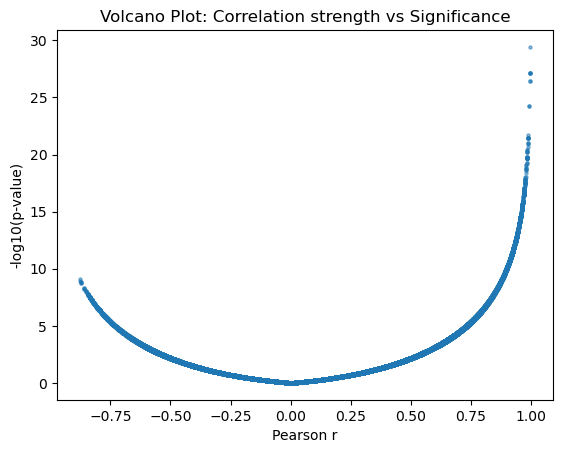

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure corr_df is defined (e.g. from your last step).
# If you’ve saved it to CSV, you can reload it via:
# import pandas as pd
# corr_df = pd.read_csv("peak_gene_correlations.csv")

# 1) Volcano plot: pearson_r vs –log10(p-value)
plt.figure()
y = -np.log10(corr_df["p_value"].values)
plt.scatter(corr_df["pearson_r"], y, s=5, alpha=0.5)
plt.xlabel("Pearson r")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot: Correlation strength vs Significance")
plt.show()


C:\Users\gusta\AppData\Local\Temp\ipykernel_12220\861585689.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\gusta\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


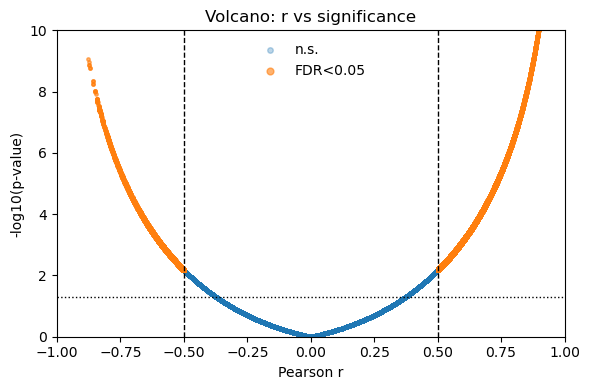

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# prepare
r = corr_df["pearson_r"].values
neglogp = -np.log10(corr_df["p_value"].values)
sig   = corr_df["q_value"] < 0.05

# plot
plt.figure(figsize=(6,4))
plt.scatter(r[~sig], neglogp[~sig], s=4, alpha=0.3, label="n.s.")
plt.scatter(r[sig],  neglogp[sig],  s=6, alpha=0.6, label="FDR<0.05")
plt.axvline( 0.5, color="k", linestyle="--", linewidth=1)
plt.axvline(-0.5, color="k", linestyle="--", linewidth=1)
plt.axhline( 1.3, color="k", linestyle=":",  linewidth=1)
plt.ylim(0, 10)   # focus on p ≥ 1e-10
plt.xlim(-1,1)
plt.xlabel("Pearson r")
plt.ylabel("-log10(p-value)")
plt.title("Volcano: r vs significance")
plt.legend(markerscale=2, frameon=False)
plt.tight_layout()
plt.show()


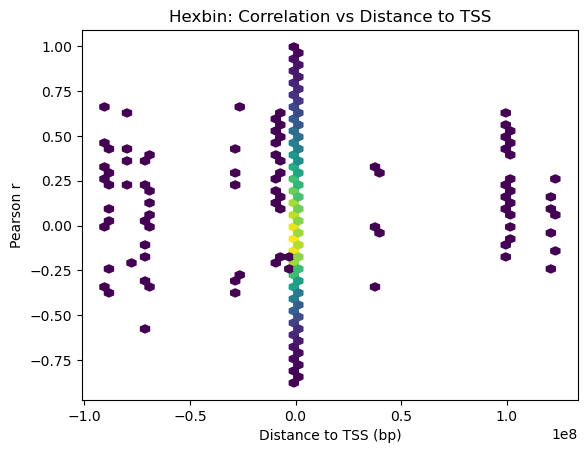

In [20]:
# 2) Hexbin of correlation vs distance
plt.figure()
plt.hexbin(corr_df["distance_to_tx"], corr_df["pearson_r"],
           gridsize=50, mincnt=1)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Pearson r")
plt.title("Hexbin: Correlation vs Distance to TSS")
plt.show()


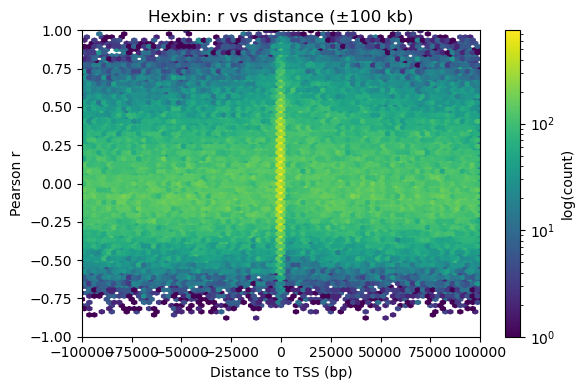

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Extract your two vectors
dist = corr_df["distance_to_tx"].values
r    = corr_df["pearson_r"].values

# 2) Mask to ±100 kb (or change to ±200 kb if you like)
mask = np.abs(dist) <= 100_000

# 3) Plot only the masked points, with a colorbar
plt.figure(figsize=(6,4))
hb = plt.hexbin(
    dist[mask],
    r[mask],
    gridsize=80,
    mincnt=1,
    bins="log",      # color = log(count)
    cmap="viridis"
)
cb = plt.colorbar(hb)
cb.set_label("log(count)")

# 4) Axis limits and labels
plt.xlim(-100_000, 100_000)
plt.ylim(-1, 1)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Pearson r")
plt.title("Hexbin: r vs distance (±100 kb)")

plt.tight_layout()
plt.show()


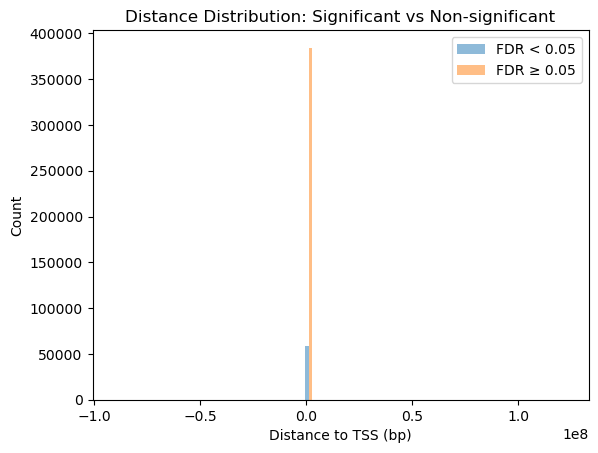

In [21]:
# 3) Overlayed histograms of distance: significant vs non‐significant
sig_mask = corr_df["q_value"] < 0.05

plt.figure()
plt.hist([ corr_df.loc[sig_mask, "distance_to_tx"],
           corr_df.loc[~sig_mask, "distance_to_tx"] ],
         bins=50,
         label=["FDR < 0.05", "FDR ≥ 0.05"],
         alpha=0.5)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Count")
plt.title("Distance Distribution: Significant vs Non‐significant")
plt.legend()
plt.show()


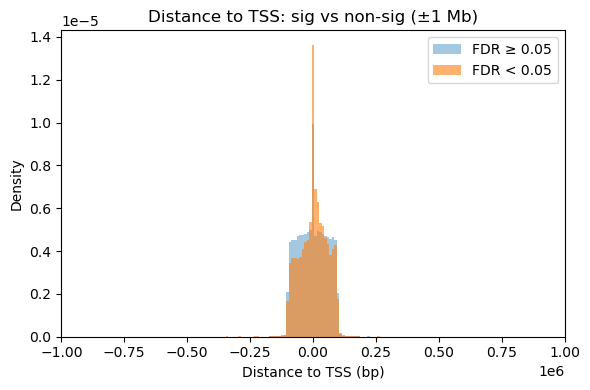

In [24]:
sig = corr_df["q_value"] < 0.05

plt.figure(figsize=(6,4))
plt.hist(
    corr_df.loc[~sig, "distance_to_tx"],
    bins=np.linspace(-1e6, 1e6, 200),
    density=True,
    alpha=0.4,
    label="FDR ≥ 0.05"
)
plt.hist(
    corr_df.loc[sig, "distance_to_tx"],
    bins=np.linspace(-1e6, 1e6, 200),
    density=True,
    alpha=0.6,
    label="FDR < 0.05"
)
plt.xlim(-1e6, 1e6)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Density")
plt.title("Distance to TSS: sig vs non-sig (±1 Mb)")
plt.legend()
plt.tight_layout()
plt.show()
